# Clustering con Python

### Importamos el dataset

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
df.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [4]:
df.shape

(1599, 12)

In [5]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

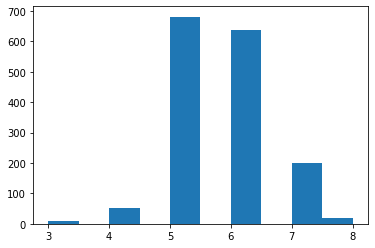

In [6]:
plt.hist(df["quality"])

In [7]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [9]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8


## Clustering jerárquico con scikit-learn

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [12]:
md = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

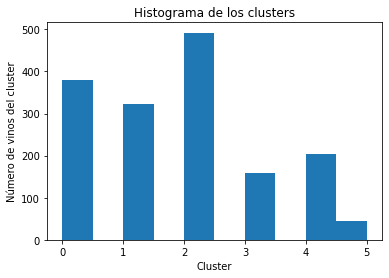

In [13]:
plt.hist(md)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [14]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
Z = linkage(df_norm, "ward")

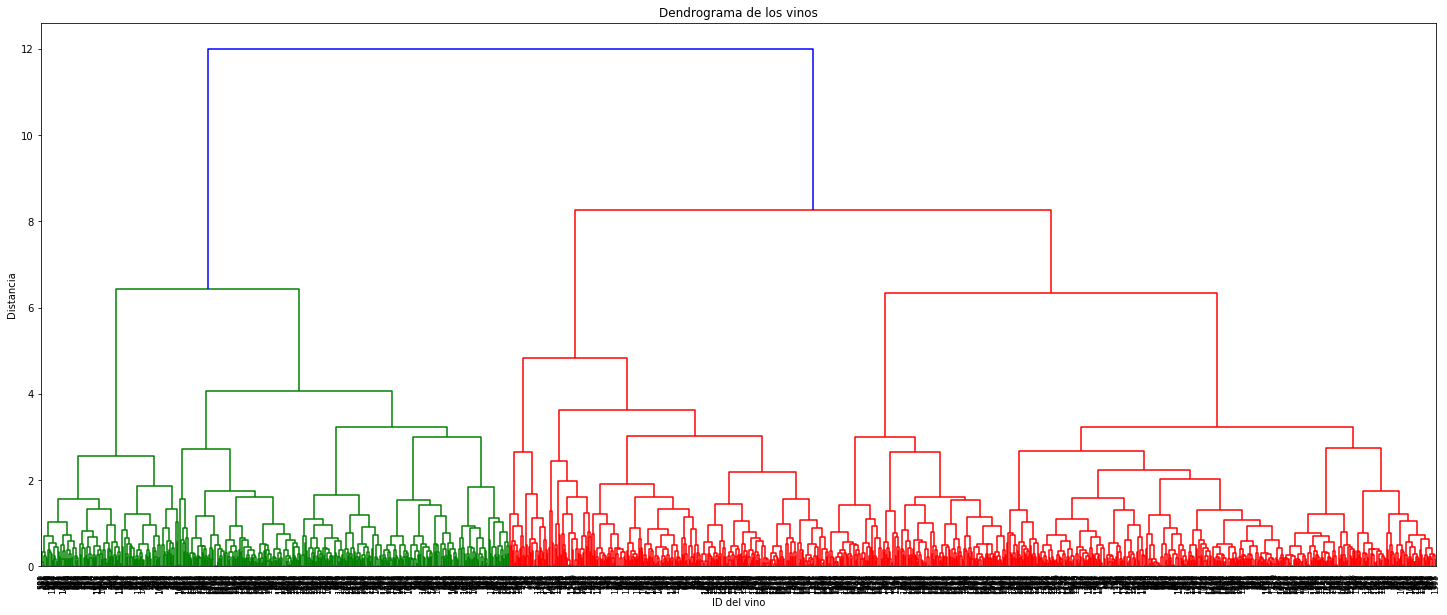

In [18]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

## K-Means

In [19]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [20]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
model.labels_

array([4, 4, 4, ..., 1, 4, 2], dtype=int32)

In [22]:
md_k = pd.Series(model.labels_)

In [23]:
df_norm["cluster_h"] = md
df_norm["cluster_k"] = md_k

In [24]:
df_norm.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h,cluster_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,2,4
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,2,4
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,2,1


(array([294.,   0., 216.,   0., 235.,   0., 266.,   0., 366., 222.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

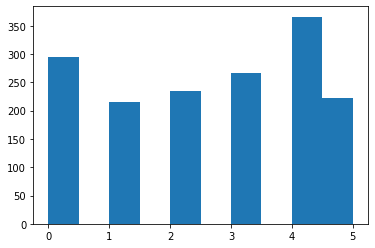

In [25]:
plt.hist(md_k)

In [27]:
model.cluster_centers_

array([[0.331437  , 0.28183534, 0.27816327, 0.08741031, 0.13639513,
        0.14003066, 0.13200404, 0.52050056, 0.41456425, 0.1844678 ,
        0.20722135, 0.47687075],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.36998682, 0.15542116, 0.4326383 , 0.10652871, 0.10547366,
        0.16553791, 0.08393354, 0.40576124, 0.41236388, 0.24008154,
        0.50271686, 0.71404255],
       [0.32074656, 0.27562056, 0.30966165, 0.16891544, 0.12820239,
        0.40762999, 0.31273413, 0.5435091 , 0.42854183, 0.19193193,
        0.22005013, 0.45714286],
       [0.23847865, 0.38311251, 0.06863388, 0.09359795, 0.12074769,
        0.16526206, 0.10563054, 0.4810348 , 0.52239577, 0.15388894,
        0.23593246, 0.4295082 ],
       [0.59208323, 0.20327348, 0.54747748, 0.13208071, 0.16962956,
        0.14642812, 0.0966638 , 0.65670516, 0.31730155, 0.25082268,
        0.29769   ,

In [28]:
model.inertia_

188.54409117931564

## Interpretación final

In [30]:
df_norm.groupby("cluster_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_h
cluster_k,,,,,,,,,,,,,
0,0.331437,0.281835,0.278163,0.087410,0.136395,0.140031,0.132004,0.520501,0.414564,0.184468,0.207221,0.476871,1.561224
1,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037
2,0.369987,0.155421,0.432638,0.106529,0.105474,0.165538,0.083934,0.405761,0.412364,0.240082,0.502717,0.714043,0.080851
3,0.320747,0.275621,0.309662,0.168915,0.128202,0.407630,0.312734,0.543509,0.428542,0.191932,0.220050,0.457143,1.041353
4,0.238479,0.383113,0.068634,0.093598,0.120748,0.165262,0.105631,0.481035,0.522396,0.153889,0.235932,0.429508,2.133880
5,0.592083,0.203273,0.547477,0.132081,0.169630,0.146428,0.096664,0.656705,0.317302,0.250823,0.297690,0.553153,2.445946
